In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
titanic = pd.read_csv('titanic.csv')
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Data Understanding 

In [109]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Cleaning data

####  *Dealing with NaN values*

In [110]:
titanic.drop(['Name' , 'PassengerId' , 'Ticket' , 'Fare', 'Cabin'], axis=1 , inplace=True)

In [111]:
titanic.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      2
dtype: int64

In [112]:
mean_of_age = np.round(titanic['Age'].mean() , decimals=2)
titanic['Age'].fillna(mean_of_age , inplace=True)
print(mean_of_age)

29.7


In [113]:
titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    2
dtype: int64

In [114]:
titanic.dropna(inplace=True)

In [115]:
titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [116]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S
887,1,1,female,19.0,0,0,S
888,0,3,female,29.7,1,2,S
889,1,1,male,26.0,0,0,C


#### *Converting categrical features    (one hot encodeing)*

In [117]:
titanic['Sex'].value_counts()

male      577
female    312
Name: Sex, dtype: int64

In [118]:
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [119]:
sex = pd.get_dummies(titanic['Sex'],drop_first=True)
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [120]:
emb = pd.get_dummies(titanic['Embarked'])
emb

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [121]:
titanic = pd.concat([titanic, sex, emb], axis=1)

In [122]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,male,C,Q,S
0,0,3,male,22.0,1,0,S,1,0,0,1
1,1,1,female,38.0,1,0,C,0,1,0,0
2,1,3,female,26.0,0,0,S,0,0,0,1
3,1,1,female,35.0,1,0,S,0,0,0,1
4,0,3,male,35.0,0,0,S,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S,1,0,0,1
887,1,1,female,19.0,0,0,S,0,0,0,1
888,0,3,female,29.7,1,2,S,0,0,0,1
889,1,1,male,26.0,0,0,C,1,1,0,0


In [123]:
titanic.drop(['Sex','Embarked'],axis=1,inplace=True)

In [124]:
titanic

,Survived,Pclass,Age,SibSp,Parch,male,C,Q,S
0,0,3,22.0,1,0,1,0,0,1
1,1,1,38.0,1,0,0,1,0,0
2,1,3,26.0,0,0,0,0,0,1
3,1,1,35.0,1,0,0,0,0,1
4,0,3,35.0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,1,0,0,1
887,1,1,19.0,0,0,0,0,0,1
888,0,3,29.7,1,2,0,0,0,1
889,1,1,26.0,0,0,1,1,0,0


In [125]:
titanic.rename(columns={'male':'Gender'} , inplace=True)

In [126]:
titanic

,Survived,Pclass,Age,SibSp,Parch,Gender,C,Q,S
0,0,3,22.0,1,0,1,0,0,1
1,1,1,38.0,1,0,0,1,0,0
2,1,3,26.0,0,0,0,0,0,1
3,1,1,35.0,1,0,0,0,0,1
4,0,3,35.0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,1,0,0,1
887,1,1,19.0,0,0,0,0,0,1
888,0,3,29.7,1,2,0,0,0,1
889,1,1,26.0,0,0,1,1,0,0


### Exploratory Data Analysis (Visualization)

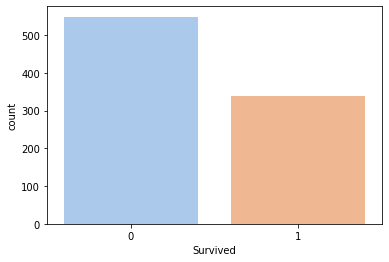

In [127]:
sns.countplot(x='Survived', data=titanic, palette='pastel')

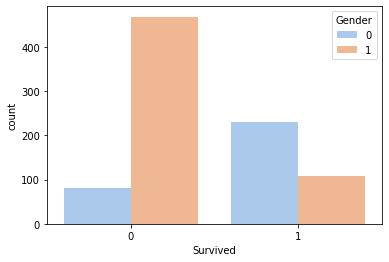

In [128]:
sns.countplot(x='Survived', data=titanic, palette='pastel',hue='Gender')

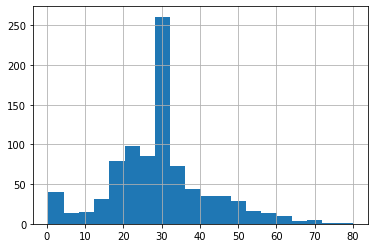

In [129]:
titanic['Age'].hist(bins=20)

### Model Building

##### Train - Test Split Data

In [130]:
X = titanic.drop(['Survived'], axis=1)
y = titanic['Survived']

In [131]:
from sklearn.model_selection import train_test_split

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [133]:
X_train.shape

(711, 8)

In [134]:
X_test.shape

(178, 8)

In [135]:
y_train.shape

(711,)

In [136]:
y_test.shape

(178,)

##### Model Training and Predicting

In [155]:
from sklearn.linear_model import LogisticRegression

In [156]:
model = LogisticRegression(max_iter=500)

In [173]:
model.fit(X_train,y_train)                 # model Building

C:\Users\moham\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [160]:
y_pred = model.predict(X_test)                    # model prediction

In [161]:
y_pred

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1], dtype=int64)

In [162]:
y_test

281    0
435    1
39     1
418    0
585    1
      ..
433    0
807    0
25     1
85     1
10     1
Name: Survived, Length: 178, dtype: int64

In [164]:
# CONVERT series to array we use .values
y_test.values

array([0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1], dtype=int64)

#####  Model Evaluation

In [167]:
from sklearn.metrics import confusion_matrix, classification_report

In [172]:
print(confusion_matrix(y_test,y_pred))

[[87 22]
 [17 52]]


In [169]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82       109
           1       0.70      0.75      0.73        69

    accuracy                           0.78       178
   macro avg       0.77      0.78      0.77       178
weighted avg       0.78      0.78      0.78       178



### Model Deployment